In [ ]:
import asyncio

#from epics import caget, caput,cainfo
from bluesky import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import grid_scan

# from ophyd.sim import noisy_det as det
from databroker import Broker
from ophyd_async.core import (
        AutoIncrementFilenameProvider,
        init_devices,
        StaticPathProvider,
)
from ophyd_async.epics.adcore import SingleTriggerDetector

from p99_bluesky.devices.p99 import (
        Andor2Ad,
        ThreeAxisStage,
)
from p99_bluesky.plans.ad_plans import takeImg
from p99_bluesky.plans.fast_scan import fast_scan_1d
from p99_bluesky.plans.stxm import (
        grid_scan,
        stxm_fast,
)

loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})
db = Broker.named('temp')
RE.subscribe(db.insert)

In [2]:
andor_data_patt_provider = StaticPathProvider(filename_provider= AutoIncrementFilenameProvider(base_filename="andor2"),
                                              directory_path="/dls/p99/data/2024/cm37284-2/processing/writenData")

from p99_bluesky.plans import takeImg

In [3]:
with init_devices():
        xyz = ThreeAxisStage(prefix="BL99P-MO-STAGE-02:", name="xyz")
        det_andor = Andor2Ad(prefix="BL99P-EA-DET-03:", name= "det_andor",path_provider=andor_data_patt_provider)
        det_andor_sum = SingleTriggerDetector(drv=det_andor.drv, read_uncached=[det_andor.drv.stat_mean])

In [ ]:
RE(fast_scan_1d(dets=[det_andor_sum],motor = xyz.x,start= 2,end =5,motor_speed=0.3),bec)

In [ ]:
RE(stxm_fast(det=det_andor_sum, count_time = 0.1, step_motor = xyz.x, step_start= -6.5, step_end=6.5,
    scan_motor = xyz.y, scan_start = -6.5, scan_end= 6.5, plan_time = 3600*12, step_size=0.025, snake_axes=True),bec)

2024-09-19 16:32:52,606 - P99 - INFO - Check xyz-y limits.
2024-09-19 16:32:52,611 - P99 - INFO - Check xyz-x limits.
2024-09-19 16:32:52,616 - P99 - INFO - ideal step size = 0.025 velocity = 0.15650764659729635 number of data point 431927.7777777778
2024-09-19 16:32:52,617 - P99 - INFO -  step size = 0.025, xyz-y: velocity = 0.15650764659729635, number of step = 520.


Transient Scan ID: 5     Time: 2024-09-19 16:32:52
Persistent Unique Scan ID: 'b64ab9e5-718c-4f03-aadd-b76068c5153f'
2024-09-19 16:32:52,722 - P99 - INFO - Check xyz-x limits.
2024-09-19 16:32:52,724 - P99 - INFO - Check xyz-y limits.
2024-09-19 16:32:53,454 - P99 - INFO - Starting 1d fly scan with xyz-y: start position = -6.5, end position = 6.5.
2024-09-19 16:33:00,811 - P99 - INFO - flying motor =  xyz-y at speed = 0.15650764659729635
New stream: 'primary'
+-----------+------------+---------------------------------+-----------------------------+------------+------------+
|   seq_num |       time | det_andor_sum-drv-a

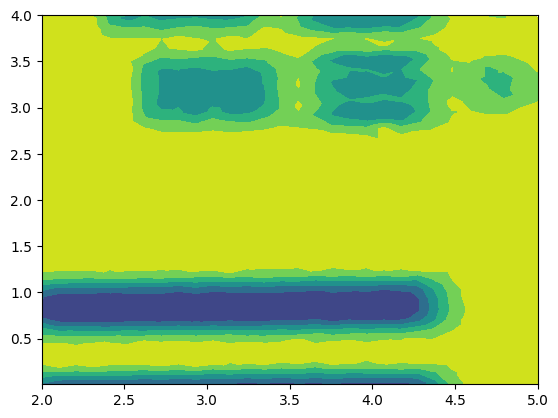

In [11]:
import matplotlib.pyplot as plt
import numpy as np

header = db[-1]
data = header.table()
levels = np.linspace(300, 1480, 50)
plt.tricontourf(data["xyz-x"],data["xyz-y"],data['det_andor_sum-drv-stat_mean'],antialiased = False)#grid_scan

In [ ]:
RE(stxm_fast(det=det_andor_sum, count_time = 0.1, step_motor = xyz.x, step_start= -6.9, step_end=6.9,
    scan_motor = xyz.y, scan_start = 6.9, scan_end= -6.9, plan_time=3600, snake_axes=True),bec)

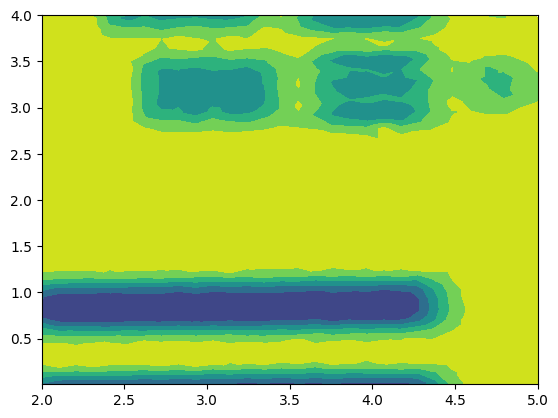

In [15]:
header = db[-1]
data = header.table()
plt.tricontourf(data["xyz-x"],data["xyz-y"],data['det_andor_sum-drv-stat_mean'],antialiased = False)

TypeError: pcolormesh() takes 1 or 3 positional arguments but 2 were given

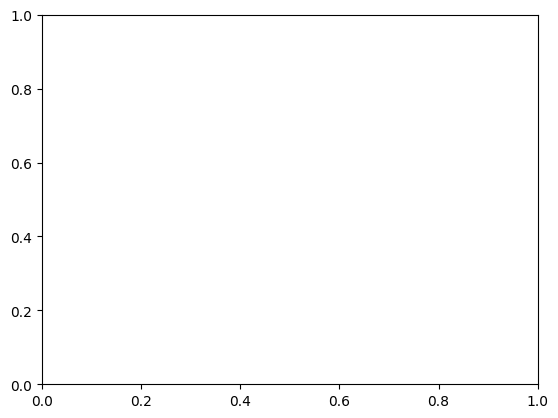

In [19]:
plt.pcolormesh(data["xyz-x"],data["xyz-y"],data['det_andor_sum-drv-stat_mean'])

In [ ]:
from pathlib import Path

from dodal.common.beamlines.beamline_utils import set_beamline as set_utils_beamline
from dodal.common.beamlines.beamline_utils import (
        set_path_provider,
)
from dodal.common.visit import StaticVisitPathProvider
from dodal.log import set_beamline as set_log_beamline
from dodal.utils import get_beamline_name
from ophyd_async.core import AutoIncrementFilenameProvider, StaticPathProvider
from ophyd_async.epics.adcore import SingleTriggerDetector

from p99_bluesky.devices import Andor2Ad
from p99_bluesky.devices.stages import ThreeAxisStage

BL = get_beamline_name("P99")
set_log_beamline(BL)
set_utils_beamline(BL)

set_path_provider(
    StaticVisitPathProvider(
        BL,
        Path(
            "/dls/p99/data/2024/cm37284-2/processing/writenData"
        ),  # latest commissioning visit
    )
)

In [ ]:
RE(grid_scan(det=det_andor_sum,
    count_time = 0.2,
    x_step_motor = xyz.x,
    x_step_start = -6.9,
    x_step_end = 6.9,
    x_step_size = 0.01,
    y_step_motor = xyz.y,
    y_step_start = -6.9,
    y_step_end = 6.9,
    y_step_size = 0.01,
    home = True,
    snake = True,),bec)

In [ ]:
caget("BL99P-EA-DET-03:HDF5:Capture")

In [ ]:
caput("BL99P-EA-DET-03:HDF5:Capture",0)

In [ ]:
RE(takeImg(det= det_andor,exposure= 0.1))

In [27]:
RE.abort()

Aborting: running cleanup and marking exit_status as 'abort'...


('c89a44fd-3064-4c84-af39-259004e59ca8',)

In [20]:
Z = np.random.rand(25, 25)

In [23]:
Z[0].size

25